In [2]:
import pandas as pd
import numpy as np
import os
import re


This section of code collects and matches all csv

In [4]:
dst_dir = "/home/thomas/RatAnalysis/RatClustering/Footshock_Session1_Fixed"

In [47]:
folders = [os.path.join(dst_dir, d) for d in os.listdir(dst_dir) if os.path.isdir(os.path.join(dst_dir, d))]
file_matches = []

for folder in folders:
    Bottom_Camera = ""
    Pose_Data = ""
    Shock_Off_Set = ""
    Shock_On_Set = ""
    Side_View = ""
    Tone_Off_Set = ""
    Tone_On_Set = ""
    Void_Timing = ""
    for filename in os.listdir(folder):
        match = re.search(r'Ai213_\d+-\d+_#\d+', filename)

        filename = os.path.join(folder,filename)
        if "Bottom_camera" in filename:
            Bottom_Camera = filename
        if "Pose_Data" in filename:
            Pose_Data = filename
        if "ShockOffset" in filename:
            Shock_Off_Set = filename
        if "ShockONset" in filename:
            Shock_On_Set = filename
        if "Side_view" in filename:
            Side_View = filename
        if "ToneOffset" in filename:
            Tone_Off_Set = filename
        if "ToneONset" in filename:
            Tone_On_Set = filename
        if "VoidTiming" in filename:
            Void_Timing = filename

    file_matches.append({
                "Filename" : match.group(0),
                "Bottom_Camera" : pd.read_csv(Bottom_Camera),
                "Pose_Data" : pd.read_csv(Pose_Data),
                "Shock_Off_Set" : pd.read_csv(Shock_Off_Set),
                "Shock_On_Set" : pd.read_csv(Shock_On_Set),
                "Side_View" : pd.read_csv(Tone_Off_Set),
                "Tone_Off_Set" : pd.read_csv(Tone_Off_Set),
                "Tone_On_Set" : pd.read_csv(Tone_On_Set),
                "Void_Timing" : pd.read_csv(Void_Timing)})

,Unnamed: 0,RightEar_x,RightEar_y,RightEar_likelihood,LeftEar_x,LeftEar_y,LeftEar_likelihood,forehead_x,forehead_y,forehead_likelihood,...,R_heel_likelihood,R_hindpaw_x,R_hindpaw_y,R_hindpaw_likelihood,L_heel_x,L_heel_y,L_heel_likelihood,L_hindpaw_x,L_hindpaw_y,L_hindpaw_likelihood
0,0,335.15700,721.53260,0.783202,348.04355,668.34580,0.826553,368.69882,705.29987,0.788175,...,0.758887,232.54587,858.36255,0.483052,330.11017,836.02844,0.511012,252.86214,848.34000,0.540674
1,1,340.26680,722.31195,0.833226,354.34277,666.34220,0.843274,374.57208,702.97424,0.866135,...,0.722505,232.49886,860.20780,0.487796,338.54666,840.53230,0.563071,252.76393,848.18665,0.474738
2,2,344.95386,721.88025,0.800621,356.96408,662.63750,0.822973,380.48087,701.92470,0.903453,...,0.577320,232.47955,862.49490,0.380469,336.07233,852.40070,0.614604,253.94696,848.30914,0.364619
3,3,348.31082,720.71390,0.854611,360.39786,660.55170,0.798898,385.28195,699.01040,0.856195,...,0.486098,225.91986,873.84780,0.237650,336.23680,859.17975,0.508069,255.29639,848.28690,0.239393
4,4,355.11465,716.82140,0.838877,365.79993,656.20325,0.708565,390.23530,696.21600,0.781691,...,0.315227,387.42370,893.99976,0.255097,337.14658,861.72480,0.435623,260.73364,846.81560,0.147067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93413,93413,707.79270,495.25827,0.879298,667.41656,515.49350,0.734309,681.15247,503.19083,1.000000,...,0.520925,676.80426,632.45044,0.417802,702.59344,637.12550,0.994132,675.85266,633.14550,0.934165
93414,93414,707.59780,495.11224,0.875873,667.36380,516.02826,0.744444,680.70000,503.17990,1.000000,...,0.527263,676.66724,632.46460,0.372306,702.68670,637.25970,0.990488,675.95680,633.04250,0.954196
93415,93415,707.78973,494.95865,0.885306,667.44050,516.02660,0.745258,680.68750,503.14185,1.000000,...,0.509007,768.89130,635.53990,0.345320,702.74560,636.91345,1.000000,675.69600,632.81240,0.965977
93416,93416,707.70740,495.06840,0.884075,667.21027,515.89435,0.760179,680.75256,503.06876,1.000000,...,0.551799,768.25400,637.48050,0.384034,702.11816,637.16486,0.994445,676.19740,633.01733,0.960925


This section creates groups of 600 frames from each video

In [56]:
bout_size_in_frames = 120
for group in file_matches:
    df = group["Pose_Data"]
    df["source"] = group["Filename"]

    num_batches = len(df) // bout_size_in_frames * bout_size_in_frames

    df = df.iloc[:num_batches].copy()
    df.loc[:, 'group'] = df.index // bout_size_in_frames

    group["Pose_Data"] = df

In [73]:
for group in file_matches:
    print(len(group["Pose_Data"]))

93360
93360
93360
93360
93360
93360
93360
93360


In [76]:
data_intervals = []
for group in (file_matches):
    df = group["Pose_Data"]
    df_drop = df[[col for col in df.columns if col.endswith('_x') or col.endswith('_y')]]
    num_intervals = len(df_drop) // bout_size_in_frames


    for i in range(num_intervals):
        interval_data = df_drop.iloc[i * bout_size_in_frames:(i + 1) * bout_size_in_frames]
        array = interval_data.values.flatten()
        first_frame = df.iloc[i * bout_size_in_frames]

        # feature_vector = interval_data.mean().values  # Use mean as an example
        data_intervals.append(array)
        # time_intervals.append((first_frame["Image"],first_frame["Seconds"],first_frame["DateTime"]))



In [79]:
len(data_intervals)

6224

In [322]:
data_intervals = []
time_intervals = []

frames_per_interval = 120

df = pd.read_csv("./20240612_Footshock_Session1/" + file_matches[0]["File"])
bouts = len(df) // frames_per_interval

coresponding_csvs = []
for group in (file_matches):

    csv = group["File"]
    df = pd.read_csv("./20240612_Footshock_Session1/" + csv)

    body_parts = df.iloc[0, 1:] 
    coords = df.iloc[1, 1:] 

    # Initialize an empty list to hold the new column names
    new_columns = []
    new_columns.append(f'Image')
    # Create new column names based on body parts and coordinates
    for part, coord in zip(body_parts, coords):
        new_columns.append(f'{part}_{coord}')
    df.columns = new_columns
    df = df[2:]
    df = df.reset_index(drop=True)
    columns = ['DateTime', 'Seconds']
    timedf = pd.read_csv("20240612_Footshock_Session1/Timestamps/" + group["Side_view"], header=None, names=columns)
    timedf = timedf.replace(r'[()]', '', regex=True)
    df = pd.concat([df, timedf], axis=1)


    df_drop = df[[col for col in df.columns if col.endswith('_x') or col.endswith('_y')]]
    
    num_intervals = len(df_drop) // frames_per_interval

    for i in range(num_intervals):
        # Extract 600-frame chunks and compute a feature vector for each
        interval_data = df_drop.iloc[i * frames_per_interval:(i + 1) * frames_per_interval]
        array = interval_data.values.flatten()
        first_frame = df.iloc[i * frames_per_interval]

        # feature_vector = interval_data.mean().values  # Use mean as an example
        coresponding_csvs.append(csv)
        data_intervals.append(array)

data_intervals = np.array(data_intervals)
time_intervals = np.array(time_intervals)


/tmp/ipykernel_1617/3794463576.py:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./20240612_Footshock_Session1/" + file_matches[0]["File"])
/tmp/ipykernel_1617/3794463576.py:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./20240612_Footshock_Session1/" + csv)
/tmp/ipykernel_1617/3794463576.py:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed

This section clusters the 10 second segments using tsne and kmeans

In [323]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_intervals)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_intervals)

kmeans = KMeans(n_clusters=8, random_state=42) 
kmeans_labels = kmeans.fit_predict(data_intervals)

dbscan = DBSCAN(eps=.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(data_intervals)


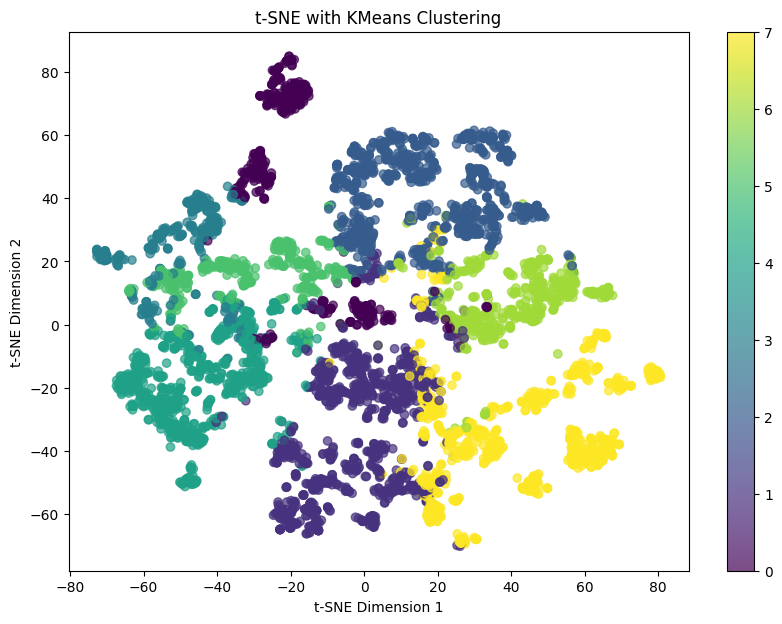

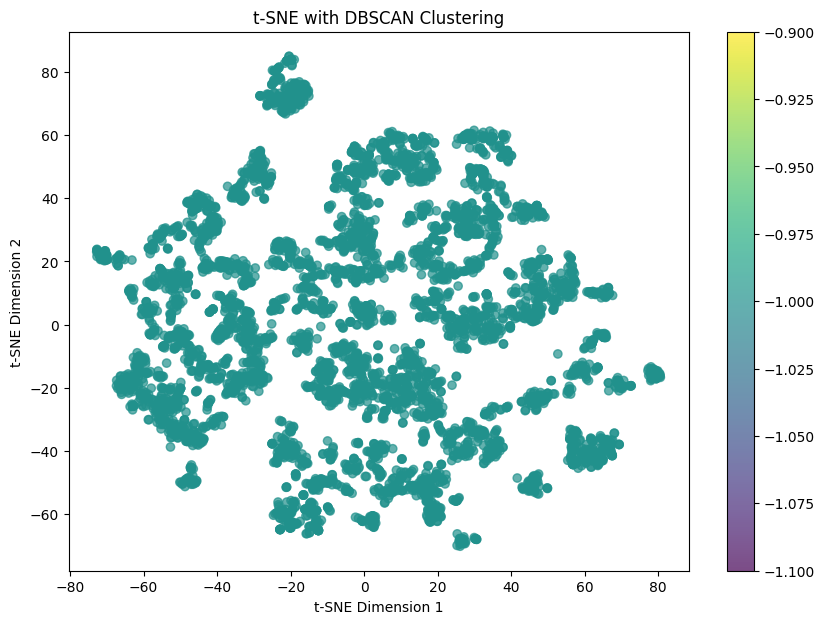

In [324]:
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('t-SNE with KMeans Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('t-SNE with DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [325]:
final_dict = {
    "files" : np.array([[entry['File'], entry['Bottom_Camera'], entry['Side_view'], entry['VoidTiming']] for entry in file_matches]),
    "Time_intervals" : time_intervals.reshape(8,bouts,3),
    "t-SNE" : tsne_results.reshape(8,bouts,2),
    "KMeans" : kmeans_labels.reshape(8,bouts),
    "DBSCAN" : dbscan_labels.reshape(8,bouts),
}

In [326]:
# occurrences = {}

# for index, value in enumerate(final_dict["CorspondingCSVs"]):
#     if value not in occurrences:
#         occurrences[value] = [index, index]  # Store first and last occurrence as the same initially
#     else:
#         occurrences[value][1] = index  # Update the last occurrence
# file = 'Footshock_Session1_Ai213_7-5_#1_Side_viewDLC_Resnet50_Fear_void_sidecamJul31shuffle1_snapshot_400.csv'
# first, last = occurrences['Footshock_Session1_Ai213_7-5_#1_Side_viewDLC_Resnet50_Fear_void_sidecamJul31shuffle1_snapshot_400.csv']


In [336]:
voiding_intervals = []
for index, group in enumerate(final_dict["files"]):
    start_time = float(final_dict["Time_intervals"][index][0][1])
    end_time = float(final_dict["Time_intervals"][index][-1][1])

    time = pd.read_csv("20240612_Footshock_Session1/Timestamps/" + final_dict["files"][index][3])
    time = time.replace(r'[()]', '', regex=True)
    time['Var4'] = pd.to_numeric(time['Var4'], errors='coerce') 

    inter_voiding_intervals = []
    for time in time["Var4"]:
        if float(time) < start_time:
            print("to early")
        inter_voiding_intervals.append((time-start_time) / (end_time-start_time) * bouts)

    voiding_intervals.append(inter_voiding_intervals)


In [339]:
voiding_intervals

[[50.35944088385599,
  558.581558604362,
  50.400664837248875,
  244.602859605556,
  481.9631079493392],
 [20.32985557243491, 580.4530559668661, 46.4001146993056],
 [102.91961990714103,
  102.96125738730541,
  24.559046230793157,
  235.02790325566335,
  390.6891406151632],
 [182.37844607106797,
  174.17704604649535,
  59.71194856843444,
  59.38980626992123,
  59.02620719098886,
  174.17704604649535,
  59.34839106268939],
 [41.564271177680006,
  43.50845233374675,
  42.82191468814926,
  41.803133397405176,
  106.85213880022589,
  40.75347163171667,
  107.25770070817335,
  107.00845353605246,
  40.99241699757703,
  42.530687031922724,
  41.564271177680006,
  44.037685804494906],
 [],
 [43.91771243313337, 43.42905392689313, 43.14855192137125],
 [32.878328923750274, 54.197284219166086]]

In [337]:
events = []
for index, video in enumerate(voiding_intervals):
    for void in video:
        events.append((index, void, "X"))

<Axes: >

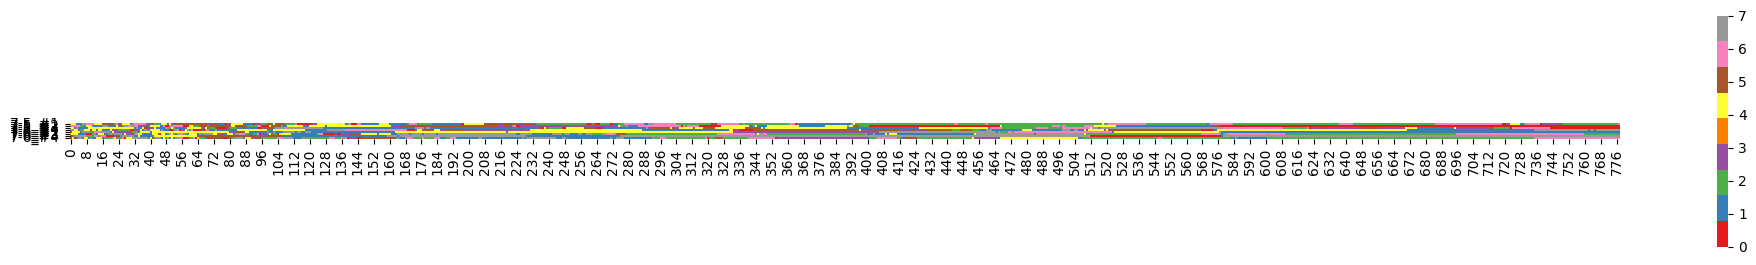

In [329]:
import seaborn as sns
data = final_dict["KMeans"]
plt.figure(figsize=(25, 3))
pattern = re.compile(r'(\d+-\d+_#\d+)')
ylabels = []

annot_matrix = np.full(data.shape, "", dtype=object)  # Empty strings for no annotation

for row, col, label in events:
    annot_matrix[row, col] = label


file_list = [entry[0] for entry in final_dict["files"]]
for file_name in file_list:
    match = pattern.search(file_name)
    if match:
        ylabels.append(match.group(1)) 

sns.heatmap(data=data,
            yticklabels=ylabels,
            cmap="Set1",
            square=True)


In [330]:
len(occurrences)

8

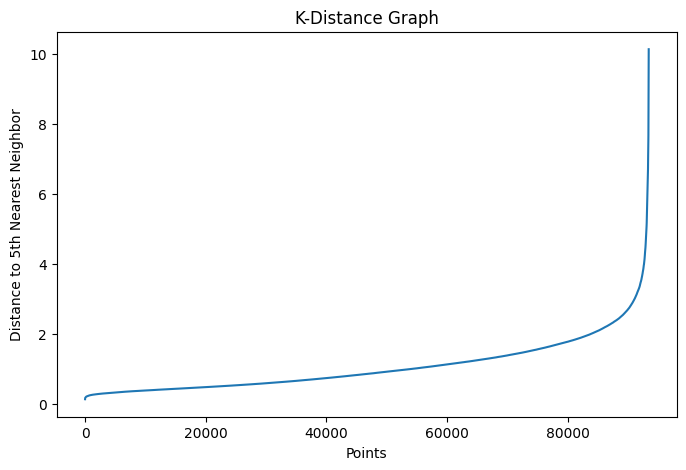

In [331]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming df_scaled is your scaled dataset (from earlier steps)
# Step 1: Compute k-nearest neighbors
neigh = NearestNeighbors(n_neighbors=100)  # Choose 5 as a typical value for DBSCAN
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Step 2: Sort the distances for the k-th nearest neighbor (in this case, 5th)
distances = np.sort(distances[:, 4])  # The 4th index because k=5

# Step 3: Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()